In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
cities = [
    (citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
     citipy.nearest_city(coordinate[0],coordinate[1]).country_code)
    for coordinate in coordinates
    if citipy.nearest_city(coordinate[0],coordinate[1]).city_name not in cities]
# Print the city count to confirm sufficient count.
len(cities)

1500

In [10]:
# Import your Requests Library and the weather_api_key.
import requests
from config import weather_api_key

In [11]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
len(city_data)

1371

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.41,100.34,80.60,94,40,2.24,MY,2020-08-30 20:28:51
1,Faanui,-16.48,-151.75,76.86,76,18,22.46,PF,2020-08-30 20:30:08
2,Albany,42.60,-73.97,72.00,44,0,13.24,US,2020-08-30 20:26:15
3,Canas,10.43,-85.09,86.00,79,40,9.17,CR,2020-08-30 20:30:08
4,Geraldton,-28.77,114.60,44.60,93,0,10.29,AU,2020-08-30 20:27:42
5,Kapaa,22.08,-159.32,82.99,69,40,16.11,US,2020-08-30 20:30:09
6,Esperance,-33.87,121.90,42.80,93,0,11.41,AU,2020-08-30 20:30:09
7,Wenatchee,47.42,-120.31,78.01,20,1,3.36,US,2020-08-30 20:30:09
8,Yurimaguas,-5.90,-76.08,95.00,59,40,6.93,PE,2020-08-30 20:30:09
9,Luderitz,-26.65,15.16,56.55,39,85,28.10,NA,2020-08-30 20:26:18


In [25]:
# Reorder the columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2020-08-30 20:28:51,5.41,100.34,80.60,94,40,2.24
1,Faanui,PF,2020-08-30 20:30:08,-16.48,-151.75,76.86,76,18,22.46
2,Albany,US,2020-08-30 20:26:15,42.60,-73.97,72.00,44,0,13.24
3,Canas,CR,2020-08-30 20:30:08,10.43,-85.09,86.00,79,40,9.17
4,Geraldton,AU,2020-08-30 20:27:42,-28.77,114.60,44.60,93,0,10.29
5,Kapaa,US,2020-08-30 20:30:09,22.08,-159.32,82.99,69,40,16.11
6,Esperance,AU,2020-08-30 20:30:09,-33.87,121.90,42.80,93,0,11.41
7,Wenatchee,US,2020-08-30 20:30:09,47.42,-120.31,78.01,20,1,3.36
8,Yurimaguas,PE,2020-08-30 20:30:09,-5.90,-76.08,95.00,59,40,6.93
9,Luderitz,NA,2020-08-30 20:26:18,-26.65,15.16,56.55,39,85,28.10


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import time module
import time

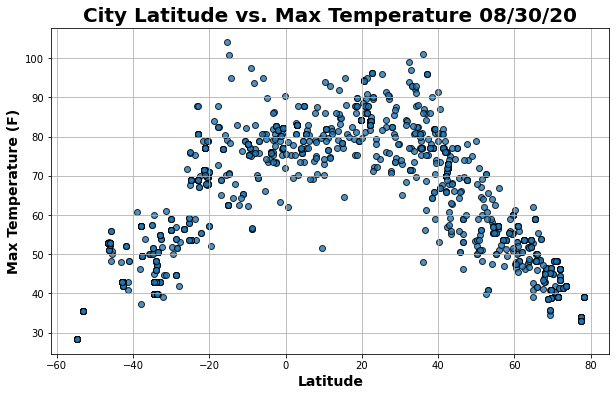

In [42]:
# Build the scatter plot for latitude vs. max temperature.
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(lats, max_temps, edgecolor="black", 
                 linewidth=1, marker="o",
                 alpha=0.8, label="Cities")
ax = plt.gca()
ax.grid()
ax.set_title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), 
             fontsize = 20, fontweight = "bold")
ax.set_xlabel("Latitude", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Max Temperature (F)", fontsize = 14, fontweight = "bold")

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

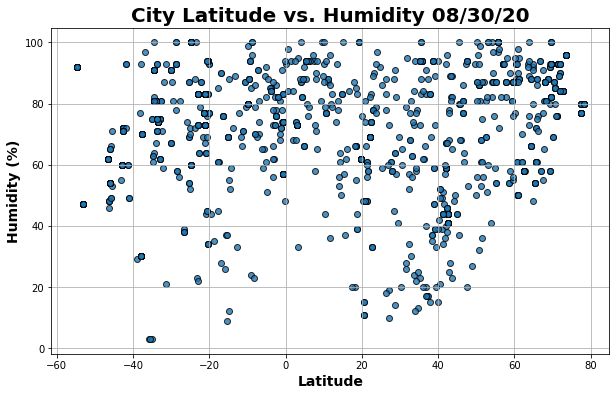

In [43]:
# Build the scatter plot for latitude vs. humidity.
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(lats, humidity, edgecolor="black", 
                 linewidth=1, marker="o",
                 alpha=0.8, label="Cities")
ax = plt.gca()
ax.grid()
ax.set_title(f"City Latitude vs. Humidity " + time.strftime("%x"), 
             fontsize = 20, fontweight = "bold")
ax.set_xlabel("Latitude", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Humidity (%)", fontsize = 14, fontweight = "bold")

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

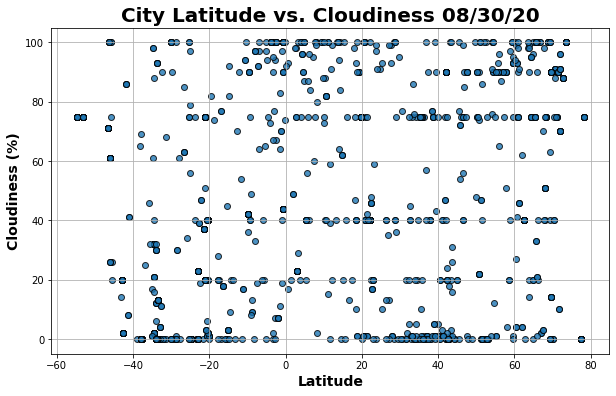

In [44]:
# Build the scatter plot for latitude vs. cloudiness.
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(lats, cloudiness, edgecolor="black", 
                 linewidth=1, marker="o",
                 alpha=0.8, label="Cities")
ax = plt.gca()
ax.grid()
ax.set_title(f"City Latitude vs. Cloudiness " + time.strftime("%x"), 
             fontsize = 20, fontweight = "bold")
ax.set_xlabel("Latitude", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Cloudiness (%)", fontsize = 14, fontweight = "bold")

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

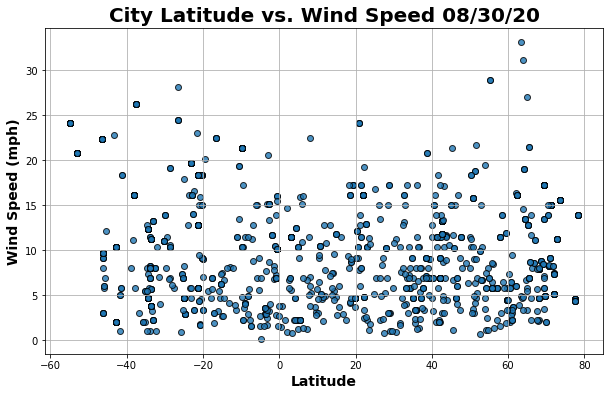

In [45]:
# Build the scatter plot for latitude vs. wind speed.
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(lats, wind_speed, edgecolor="black", 
                 linewidth=1, marker="o",
                 alpha=0.8, label="Cities")
ax = plt.gca()
ax.grid()
ax.set_title(f"City Latitude vs. Wind Speed " + time.strftime("%x"), 
             fontsize = 20, fontweight = "bold")
ax.set_xlabel("Latitude", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Wind Speed (mph)", fontsize = 14, fontweight = "bold")

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [62]:
# Import linear regression from scipy.stats
from scipy.stats import linregress

In [101]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #line_rvalue = "r-value = " + str(round(r_value, 2))
    line_eq = f"y = {slope:.2f}x + {intercept:.2f} \nr-value = {r_value:.2f}"
    
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    #plt.annotate(line_rvalue, rval_coordinates)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [56]:
# Filter city_data_df to get Northern Hemisphere lats
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
print(len(northern_hemi_df))
northern_hemi_df.head()

705


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2020-08-30 20:28:51,5.41,100.34,80.60,94,40,2.24
2,Albany,US,2020-08-30 20:26:15,42.60,-73.97,72.00,44,0,13.24
3,Canas,CR,2020-08-30 20:30:08,10.43,-85.09,86.00,79,40,9.17
5,Kapaa,US,2020-08-30 20:30:09,22.08,-159.32,82.99,69,40,16.11
7,Wenatchee,US,2020-08-30 20:30:09,47.42,-120.31,78.01,20,1,3.36


In [58]:
# Filter city_data_df to get Southern Hemisphere lats
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Faanui,PF,2020-08-30 20:30:08,-16.48,-151.75,76.86,76,18,22.46
4,Geraldton,AU,2020-08-30 20:27:42,-28.77,114.60,44.60,93,0,10.29
6,Esperance,AU,2020-08-30 20:30:09,-33.87,121.90,42.80,93,0,11.41
8,Yurimaguas,PE,2020-08-30 20:30:09,-5.90,-76.08,95.00,59,40,6.93
9,Luderitz,NA,2020-08-30 20:26:18,-26.65,15.16,56.55,39,85,28.10


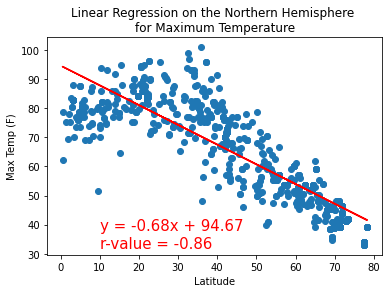

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", "Max Temp (F)", (10, 32))

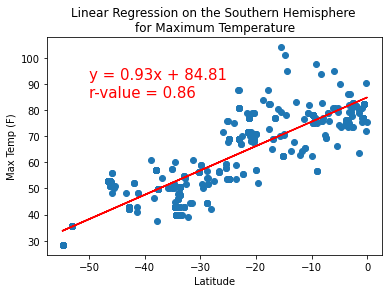

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", "Max Temp (F)", (-50, 85))

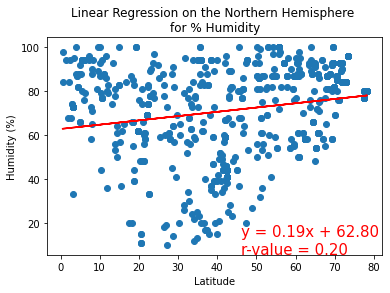

In [102]:
# Linear regression for Percent Humidity on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor % Humidity", "Humidity (%)", (46, 6))

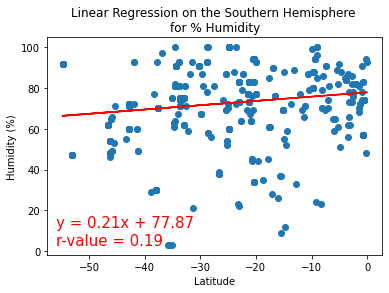

In [103]:
# Linear regression for Percent Humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor % Humidity", "Humidity (%)", (-56, 3))

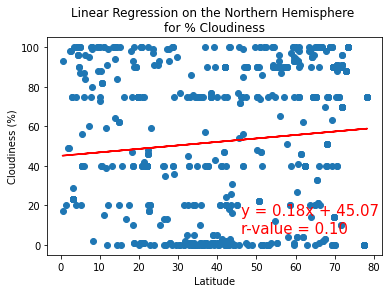

In [104]:
# Linear regression for Percent Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor % Cloudiness", "Cloudiness (%)", (46, 6))

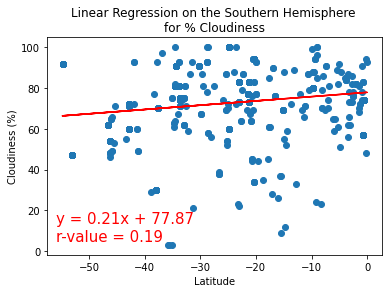

In [107]:
# Linear regression for Percent Cloudiness on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor % Cloudiness", "Cloudiness (%)", (-56, 5))

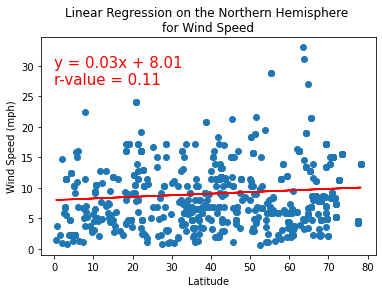

In [111]:
# Linear regression for Wind Speed on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor Wind Speed", "Wind Speed (mph)", (0, 27))

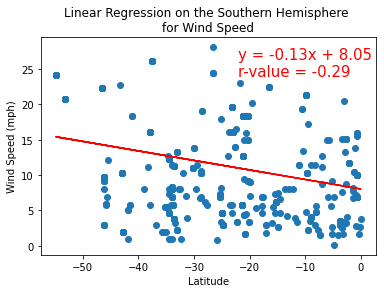

In [120]:
# Linear regression for Wind Speed on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor Wind Speed", "Wind Speed (mph)", (-22, 24))